In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('/kaggle/input/playground-series-s3e17/train.csv')

In [3]:
df.head(5)

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


In [4]:
df.describe()

,id,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000
mean,68214.000000,299.862776,309.941070,1520.331110,40.348643,104.408901,0.015744,0.001554,0.005160,0.002397,0.003958,0.002258
std,39383.804275,1.862247,1.385173,138.736632,8.502229,63.965040,0.124486,0.039389,0.071649,0.048899,0.062789,0.047461
min,0.000000,295.300000,305.800000,1181.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34107.000000,298.300000,308.700000,1432.000000,34.600000,48.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,68214.000000,300.000000,310.000000,1493.000000,40.400000,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,102321.000000,301.200000,310.900000,1580.000000,46.100000,159.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,136428.000000,304.400000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
df.columns

Index(['id', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF'],
      dtype='object')

In [6]:
df['Machine failure'].value_counts()

0    134281
1      2148
Name: Machine failure, dtype: int64

In [7]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [18]:
x = df[['Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF']]

y = df['Machine failure']

In [19]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 42)

In [20]:
lreg = LogisticRegression(solver='lbfgs')
lreg.fit(x_train,y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [21]:
y_predict = lreg.predict(x_test)

In [23]:
y_predict_train = lreg.predict(x_train)

In [29]:
y_prob_train = lreg.predict_proba(x_train)[:,1]
y_prob_train.reshape(1,-1)

array([[0.00385069, 0.00143707, 0.00315711, ..., 0.00139233, 0.00277061,
        0.00558858]])

In [30]:
y_prob = lreg.predict_proba(x_test)[:,1]
y_prob.reshape(1,-1)

array([[9.99249436e-01, 3.48306725e-03, 3.18971017e-03, ...,
        1.23329721e-03, 8.49156777e-04, 1.46285471e-03]])

In [33]:
import statsmodels.api as sm
x1 = sm.add_constant(x)
logit_model = sm.Logit(y,x1)
result = logit_model.fit()
print(result.summary())

         Current function value: 0.023101
         Iterations: 35


/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                           Logit Regression Results                           
Dep. Variable:        Machine failure   No. Observations:               136429
Model:                          Logit   Df Residuals:                   136417
Method:                           MLE   Df Model:                           11
Date:                Thu, 17 Aug 2023   Pseudo R-squ.:                  0.7147
Time:                        13:00:57   Log-Likelihood:                -3151.6
converged:                      False   LL-Null:                       -11048.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     -23.5379     10.384     -2.267      0.023     -43.890      -3.186
Type                       -0.2223      0.085     -2.607      0.009      -0.389      -0.055


In [35]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test,y_predict)
score

0.9952210625073297

In [36]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_predict)

array([[33570,     3],
       [  160,   375]])

In [37]:
tn,fp,fn,tp = confusion_matrix(y_test,y_predict).ravel()
print('True Negatives :', tn)
print('False Positives :', fp)
print('False Negatives :', fn)
print('True  Positives :', tp)



True Negatives : 33570
False Positives : 3
False Negatives : 160
True  Positives : 375


In [38]:
from sklearn.metrics import classification_report
classification_report(y_test,y_predict)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00     33573\n           1       0.99      0.70      0.82       535\n\n    accuracy                           1.00     34108\n   macro avg       0.99      0.85      0.91     34108\nweighted avg       1.00      1.00      0.99     34108\n'

In [42]:
Accuracy = (tp + tn)/(tp + tn + fp + fn)
print("Accuracy : {:.02f}".format(Accuracy))

Accuracy : 1.00


# True Negative Rate

In [43]:
specificity = tn/(tn + fp)
print("Specificity : {:.02f}".format(specificity))

Specificity : 1.00


# True Positive Rate

In [44]:
senstivity = tp/(tp + fn)
print("Senstivity : {:.02f}".format(senstivity))

Senstivity : 0.70


# ROC Curve

In [45]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
log_roc_auc = roc_auc_score(y_train,y_predict_train)
fpr1, tpr1, thresholds1 = roc_curve(y_train, y_prob_train)
roc_auc1 = auc(fpr1,tpr1)

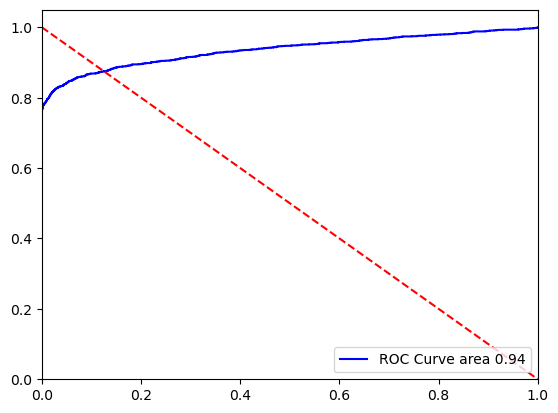

In [46]:
plt.figure()
plt.plot(fpr1,tpr1,color='blue',label = 'ROC Curve area %0.2f' % roc_auc1)
plt.plot([0,1],[1,0],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.legend(loc='lower right')
plt.show()

In [48]:
log_roc_auc1 = roc_auc_score(y_test,y_predict)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr,tpr)

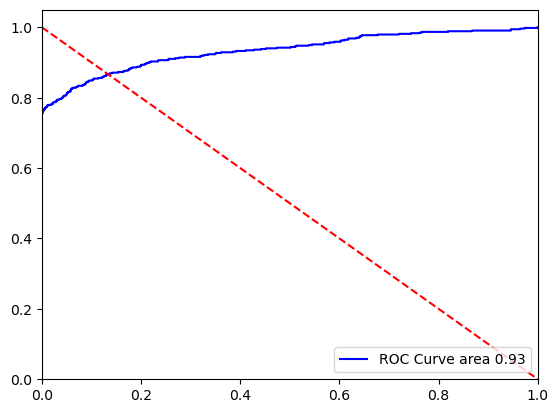

In [49]:
plt.figure()
plt.plot(fpr,tpr,color='blue',label = 'ROC Curve area %0.2f' % roc_auc)
plt.plot([0,1],[1,0],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.legend(loc='lower right')
plt.show()

# Set the threshold at 0.35

In [55]:
from sklearn.preprocessing import binarize
threshold = 0.35




In [62]:
y_predict_class1 = binarize(y_prob.reshape(1,-1) > threshold)[0]

In [65]:
y_predict_class1 = y_predict_class1.astype(int)


In [66]:
y_predict_class1

array([1, 0, 0, ..., 0, 0, 0])

In [68]:
confusion_matrix2 = confusion_matrix(y_test,y_predict_class1)
print(confusion_matrix2)

[[33568     5]
 [  147   388]]


In [70]:
tn1,fp1,fn1,tp1 = confusion_matrix(y_test,y_predict_class1).ravel()
print('True Negatives :', tn1)
print('False Positives :', fp1)
print('False Negatives :', fn1)
print('True  Positives :', tp1)



True Negatives : 33568
False Positives : 5
False Negatives : 147
True  Positives : 388


# Find optimal cutoff point ( Thresholds)

In [71]:
from sklearn.metrics import roc_curve, auc

In [72]:
fpr, tpr, thresholds  = roc_curve(y_test, y_prob)
roc_auc = auc(fpr,tpr)

In [73]:
print("ROC Area under the curve : %0.f" % roc_auc)

ROC Area under the curve : 1


In [74]:
i = np.arange(len(tpr))
roc = pd.DataFrame({'fpr': pd.Series(fpr,index=i),'tpr': pd.Series(tpr, index=i),
                   '1-fpr': pd.Series(1-fpr, index=i), 'tf' : pd.Series(tpr - (1-fpr), index = i),
                   'thresholds' : pd.Series(thresholds, index = i)})
roc.iloc[(roc.tf-0).abs().argsort()[:1]]

,fpr,tpr,1-fpr,tf,thresholds
156,0.133351,0.86729,0.866649,0.000641,0.008398


[Text(-50.0, 0, ''),
 Text(0.0, 0, ''),
 Text(50.0, 0, ''),
 Text(100.0, 0, ''),
 Text(150.0, 0, ''),
 Text(200.0, 0, ''),
 Text(250.0, 0, ''),
 Text(300.0, 0, ''),
 Text(350.0, 0, ''),
 Text(400.0, 0, ''),
 Text(450.0, 0, '')]

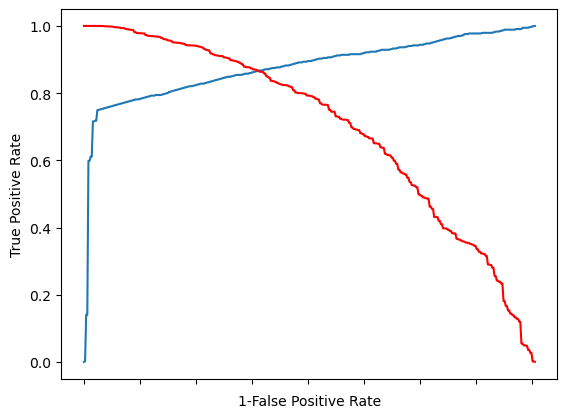

In [75]:
fig,ax = plt.subplots()
plt.plot(roc['tpr'])
plt.plot(roc['1-fpr'],color='red')
plt.xlabel('1-False Positive Rate')
plt.ylabel('True Positive Rate')
ax.set_xticklabels([])